<div id="container" style="position:relative;">
<div style="float:left"><h1> NLP with Hotel Review Part 2</h1>
</div>
<div style="position:relative; float:right">

## Sri Casper

## Table of Contents:
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Linear Classifier](#Linear-Classifier)
* [K-Nearest Neighbour Classifier](#K-Nearest-Neighbour-Classifier)
* [Decision Tree Classifier](#Decision-Tree-Classifier)
* [Purpose of the Validation Set](#Purpose-of-the-Validation-Set)
* [Re-run a Decision Tree or Logistic Regression](#Re-run-a-Decision-Tree-or-Logistic-Regression)
* [Create One New Feature](#Create-One-New-Feature)

## Exploratory Data Analysis

In [56]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, auc

from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the data from .csv files
# Assign the file to 'test_df' and 'train_df'

test_df = pd.read_csv('clean_data/clean_test_dataframe.csv')
train_df = pd.read_csv('clean_data/clean_train_dataframe.csv')

In [3]:
# Shape of 'test_df' dataframe

test_df.shape

(4267, 2744)

In [4]:
# Shape of 'train_df' dataframe

train_df.shape

(12798, 2744)

In [5]:
# Print out rows and columns of the dataframes

print(f"There are {test_df.shape[0]} rows and {test_df.shape[1]} columns in 'test_df'.")
print(f"There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in 'train_df'.")

There are 4267 rows and 2744 columns in 'test_df'.
There are 12798 rows and 2744 columns in 'train_df'.


In [6]:
# See a quick summary of each column, the datatypes

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4267 entries, 0 to 4266
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 89.3 MB


In [7]:
# See a quick summary of each column, the datatypes

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12798 entries, 0 to 12797
Columns: 2744 entries, Additional_Number_of_Scoring to rating
dtypes: float64(3), int64(2741)
memory usage: 267.9 MB


- There are two kinds of data types in both dataframes including <b>3 columns of 'float64' and 2741 'int64'</b>.

In [8]:
# Check the data (head)

test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,1005,8.3,0,3469,6,2,297,51.559096,-0.284704,0,...,0,0,0,0,0,0,0,0,0,0
1,487,8.8,46,1805,121,1,4,51.474469,-0.019428,6,...,0,0,0,0,0,0,0,0,0,1
2,570,9.3,0,2319,9,1,590,51.505696,-0.101525,1,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,19,12158,0,2,269,51.500961,-0.116591,0,...,0,0,0,0,0,0,0,0,0,0
4,365,8.1,13,1567,0,2,373,51.515125,-0.160066,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Check the data (head)

train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worry,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,1
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,1
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


- These two dataframes have the same amount of columns.

In [10]:
(test_df.shape[0]/train_df.shape[0])*100

33.34114705422722

- The records (rows) in test_df are 33% of the records in train_df.

In [11]:
# Check if there is any duplicate

test_df.duplicated().sum()

0

In [12]:
# Check if there is any duplicate

train_df.duplicated().sum()

0

- There is no duplicate in both dataframes.

In [13]:
test_df.isna().sum()

Additional_Number_of_Scoring         0
Average_Score                        0
Review_Total_Negative_Word_Counts    0
Total_Number_of_Reviews              0
Review_Total_Positive_Word_Counts    0
                                    ..
n_year                               0
n_yes                                0
n_yet                                0
n_young                              0
rating                               0
Length: 2744, dtype: int64

In [14]:
train_df.isna().sum()

Additional_Number_of_Scoring         0
Average_Score                        0
Review_Total_Negative_Word_Counts    0
Total_Number_of_Reviews              0
Review_Total_Positive_Word_Counts    0
                                    ..
n_year                               0
n_yes                                0
n_yet                                0
n_young                              0
rating                               0
Length: 2744, dtype: int64

- There is no missing value in both dataframes.

In [15]:
# Basic EDA summary for test_df

print(f"Total rows: {test_df.shape[0]}")
print(f"Total columns: {test_df.shape[1]}")
print(f"Null values: {test_df.isna().sum().sum()}")

Total rows: 4267
Total columns: 2744
Null values: 0


In [16]:
# Basic EDA summary for train_df

print(f"Total rows: {train_df.shape[0]}")
print(f"Total columns: {train_df.shape[1]}")
print(f"Null values: {train_df.isna().sum().sum()}")

Total rows: 12798
Total columns: 2744
Null values: 0


In [17]:
# Check target distribution

train_df['rating'].value_counts()

1    7373
0    5425
Name: rating, dtype: int64

In [18]:
# Check target distribution

train_df['rating'].value_counts(normalize=True)

1    0.576106
0    0.423894
Name: rating, dtype: float64

- There is slightly imbalance in the target class distribution since there is approximately <b>58% of 'good'</b> ratings (1) and <b>42% of 'bad'</b> ratings (0).

## Linear Classifier

#### Train-test split

`rating` is the target in this case, and split the data into a train and test set allow us to make a base model. 

In [105]:
# Assign X and y to 'test_df' dataset

# Independent variables
# All columns but 'rating'
X_test = test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_test = test_df['rating']

In [106]:
# Assign X and y to 'train_df' dataset

# Independent variables
# All columns but 'rating'
X_train = train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_train = train_df['rating']

In [21]:
print('The absolute class distribution is:', f'\n{y_train.value_counts()}')
print(f'\nThe relative (%) class distribution is: \n{y_train.value_counts(normalize=True)*100}')

The absolute class distribution is: 
1    7373
0    5425
Name: rating, dtype: int64

The relative (%) class distribution is: 
1    57.610564
0    42.389436
Name: rating, dtype: float64


In [22]:
# Check the shapes

print("Subset dimensions:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

Subset dimensions:
X_train: (12798, 2743)
y_train: (12798,)


In [23]:
# checking binary target (in numpy)

np.unique(y_train)

array([0, 1])

#### Fit a logisitic regression model to this data with the solver set to `lbfgs`

In [24]:
# Fit a log_reg model with solver='lbfgs'

log_reg1 = LogisticRegression(solver='lbfgs') 

log_reg1.fit(X_train, y_train)

print(f"Accuracy score on the train set: {log_reg1.score(X_train, y_train)}")
print(f"Accuracy score on the test set: {log_reg1.score(X_test, y_test)}")

Accuracy score on the train set: 0.7238631036099391
Accuracy score on the test set: 0.7176001874853527


In [25]:
# Fit a log_reg model with C, penalty, and solver
# Penalized logistic regression imposes a penalty to the logistic model for having too many variables.
# This results in shrinking the coefficients of the less contributive variables toward zero.
# This is also known as regularization.

log_reg2 = LogisticRegression(C=0.1, penalty='l2', solver='lbfgs') 

log_reg2.fit(X_train, y_train)

print(f"Accuracy score on the train set: {log_reg2.score(X_train, y_train)}")
print(f"Accuracy score on the test set: {log_reg2.score(X_test, y_test)}")

Accuracy score on the train set: 0.7223003594311611
Accuracy score on the test set: 0.720881181157722


#### Evaluate the performance of the models

In [26]:
log_reg1.coef_

array([[ 4.74461478e-04,  7.79814309e-02, -4.69763660e-02, ...,
         5.36798594e-04, -4.25580088e-06,  2.86932300e-04]])

In [27]:
# remember we fit our model on X_withconstant
model_predictions_prob = log_reg1.predict(X_train)

# getting the binary predictions
model_predictions_binary = np.where(model_predictions_prob>0.5,1,0) #50%

In [28]:
model_predictions_prob

array([1, 1, 1, ..., 1, 0, 1])

In [29]:
model_predictions_binary

array([1, 1, 1, ..., 1, 0, 1])

In [30]:
# comparing true and predicted 

(model_predictions_binary == train_df['rating']).sum() #True = 1

9264

In [31]:
train_df['rating'].sum()

7373

In [32]:
# how many data points in total?
len(train_df['rating'])

12798

#### What are the 20 words most predictive of a good review (from the positive review column)? What are the 20 words most predictive with a bad review (from the negative review column)? Use the regression coefficients to answer this question

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate
bagofwords = CountVectorizer(stop_words="english")

# Fit the model
bagofwords.fit(X_train)

# Transform
X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

In [34]:
# Shape of X_train_transformed

X_train_transformed.shape

(2743, 2801)

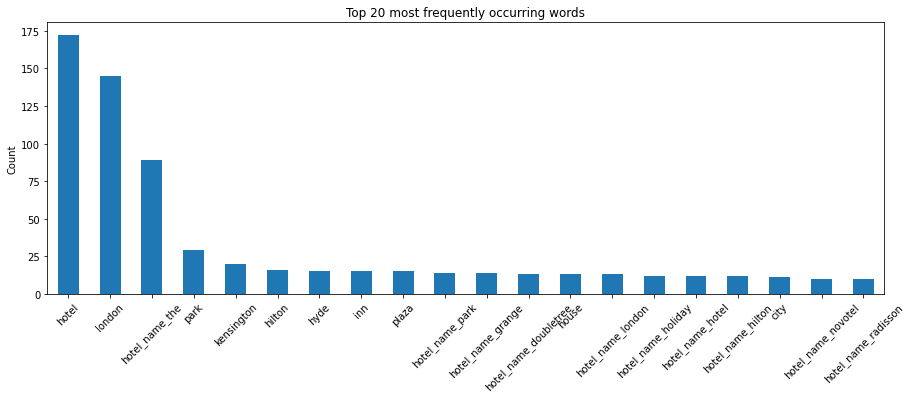

In [35]:
# Top 20 most frequently occurring words

word_counts = pd.DataFrame(
    {"counts": X_train_transformed.toarray().sum(axis=0)},
    index=bagofwords.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- <b>'hotel', 'london', and 'hotel_name_the'</b> are the top 3 most frequently occuring words.

####  Find the 20 words most predictive of a good review (from the positive review column) using Regression Coefficients

In [42]:
# Assign pos_col to columns with positive words/reviews

pos_col = [col for col in train_df if col.startswith('p_')]

pos_col

['p_',
 'p_02',
 'p_1',
 'p_10',
 'p_100',
 'p_11',
 'p_12',
 'p_15',
 'p_1st',
 'p_2',
 'p_20',
 'p_24',
 'p_2nd',
 'p_3',
 'p_30',
 'p_4',
 'p_5',
 'p_50',
 'p_6',
 'p_7',
 'p_8',
 'p_able',
 'p_absolutely',
 'p_access',
 'p_accessible',
 'p_accommodate',
 'p_accommodation',
 'p_across',
 'p_actually',
 'p_add',
 'p_adequate',
 'p_afternoon',
 'p_air',
 'p_aircon',
 'p_airport',
 'p_airy',
 'p_albert',
 'p_allocate',
 'p_allow',
 'p_almost',
 'p_along',
 'p_already',
 'p_also',
 'p_although',
 'p_always',
 'p_amaze',
 'p_amazingly',
 'p_ambiance',
 'p_ambience',
 'p_amenity',
 'p_anniversary',
 'p_another',
 'p_anyone',
 'p_anything',
 'p_anywhere',
 'p_apart',
 'p_apartment',
 'p_apollo',
 'p_apologetic',
 'p_appear',
 'p_appoint',
 'p_appreciate',
 'p_approachable',
 'p_area',
 'p_arena',
 'p_around',
 'p_arrange',
 'p_arrival',
 'p_arrive',
 'p_ask',
 'p_aspect',
 'p_atmosphere',
 'p_attend',
 'p_attention',
 'p_attentive',
 'p_attitude',
 'p_attraction',
 'p_attractive',
 'p_avai

In [64]:
# Convert list to array
pos_array = np.array(pos_col)
 
# Print array
print ("Array: ", pos_array)

Array:  ['p_' 'p_02' 'p_1' 'p_10' 'p_100' 'p_11' 'p_12' 'p_15' 'p_1st' 'p_2'
 'p_20' 'p_24' 'p_2nd' 'p_3' 'p_30' 'p_4' 'p_5' 'p_50' 'p_6' 'p_7' 'p_8'
 'p_able' 'p_absolutely' 'p_access' 'p_accessible' 'p_accommodate'
 'p_accommodation' 'p_across' 'p_actually' 'p_add' 'p_adequate'
 'p_afternoon' 'p_air' 'p_aircon' 'p_airport' 'p_airy' 'p_albert'
 'p_allocate' 'p_allow' 'p_almost' 'p_along' 'p_already' 'p_also'
 'p_although' 'p_always' 'p_amaze' 'p_amazingly' 'p_ambiance' 'p_ambience'
 'p_amenity' 'p_anniversary' 'p_another' 'p_anyone' 'p_anything'
 'p_anywhere' 'p_apart' 'p_apartment' 'p_apollo' 'p_apologetic' 'p_appear'
 'p_appoint' 'p_appreciate' 'p_approachable' 'p_area' 'p_arena' 'p_around'
 'p_arrange' 'p_arrival' 'p_arrive' 'p_ask' 'p_aspect' 'p_atmosphere'
 'p_attend' 'p_attention' 'p_attentive' 'p_attitude' 'p_attraction'
 'p_attractive' 'p_available' 'p_away' 'p_awesome' 'p_awful' 'p_baby'
 'p_back' 'p_bad' 'p_bag' 'p_balcony' 'p_balloon' 'p_bank' 'p_bar'
 'p_barbican' 'p_base'

In [65]:
# Identify the regression coefficients
coefficients = log_reg1.coef_

# Create a dictionary mapping words to coefficients
word_coefficients = dict(zip(pos_array, coefficients))

# Sort the words by their coefficients
sorted_words = sorted(word_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 words
top_words = [word for word, coefficient in sorted_words[:20]]

# Print the top 20 words
print(top_words)

['p_']


In [63]:
# Another solution
# Top 20 words in Positive Reviews

word_counts = pd.DataFrame(
    {"coefficients": log_reg1.coef_[0]},
    index=pos_array).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

ValueError: Length of values (2743) does not match length of index (1343)

####  Find the 20 words most predictive of a bad review (from the negative review column) using Regression Coefficients

In [57]:
# Assign pos_col to columns with positive words/reviews

neg_col = [col for col in train_df if col.startswith('n_')]

neg_col

['n_',
 'n_00',
 'n_02',
 'n_1',
 'n_10',
 'n_100',
 'n_11',
 'n_11am',
 'n_11pm',
 'n_12',
 'n_15',
 'n_16',
 'n_17',
 'n_18',
 'n_1st',
 'n_2',
 'n_20',
 'n_200',
 'n_21',
 'n_24',
 'n_25',
 'n_2am',
 'n_2nd',
 'n_2pm',
 'n_3',
 'n_30',
 'n_30am',
 'n_30pm',
 'n_3am',
 'n_3pm',
 'n_3rd',
 'n_4',
 'n_40',
 'n_45',
 'n_4th',
 'n_5',
 'n_50',
 'n_5am',
 'n_5th',
 'n_6',
 'n_6am',
 'n_7',
 'n_70',
 'n_7th',
 'n_8',
 'n_8am',
 'n_9',
 'n_90',
 'n_95',
 'n_9am',
 'n_abit',
 'n_able',
 'n_abrupt',
 'n_absolutely',
 'n_ac',
 'n_accept',
 'n_acceptable',
 'n_access',
 'n_accessible',
 'n_accommodate',
 'n_accommodation',
 'n_account',
 'n_across',
 'n_actually',
 'n_add',
 'n_addition',
 'n_additional',
 'n_address',
 'n_adequate',
 'n_adjacent',
 'n_adjoin',
 'n_adult',
 'n_advance',
 'n_advertise',
 'n_advise',
 'n_affect',
 'n_afternoon',
 'n_age',
 'n_ago',
 'n_agree',
 'n_ahead',
 'n_air',
 'n_aircon',
 'n_alarm',
 'n_allocate',
 'n_allow',
 'n_almost',
 'n_along',
 'n_already',
 'n_also

In [58]:
# Convert list to array
neg_array = np.array(neg_col)
 
# Print array
print ("Array: ", neg_array)

Array:  ['n_' 'n_00' 'n_02' ... 'n_yes' 'n_yet' 'n_young']


In [60]:
# Identify the regression coefficients
coefficients = log_reg1.coef_

# Create a dictionary mapping words to coefficients
word_coefficients = dict(zip(neg_array, coefficients))

# Sort the words by their coefficients
sorted_words = sorted(word_coefficients.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 words
top_words = [word for word, coefficient in sorted_words[:20]]

# Print the top 20 words
print(top_words)

['n_']


In [ ]:
# Another solution
# Top 20 words in Negative Reviews

word_counts = pd.DataFrame(
    {"coefficients": log_reg1.coef_[0]},
    index=neg_array).sort_values("coefficients", ascending=False)

word_counts.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

#### Reduce the dimensionality of the dataset using PCA

<b>All PCs will be kept for now</b>
Applying PCA in Scikit-learn follows a similar process to scaling data. Here we will convert our scaled train and test data into Principal Components. In this case we are not setting a pre-determined number of components, so <b>the number of Principal Components will likely be quite high.</b>

In [77]:
from sklearn.decomposition import PCA

# Instantiate and fit to scaled training data
hotel_pca = PCA(n_components=None).fit(X_train)

# Transform train and test sets 
X_train_PC = hotel_pca.transform(X_train)
X_test_PC = hotel_pca.transform(X_test)

In [ ]:
# Create a variable to assign the column names
pca_cols = [f"PC{x}" for x in range(1, len(hotel_pca.components_)+1)]

# Again putting training set into DataFrame
X_train_PC = pd.DataFrame(X_train_PC, columns=pca_cols)

# Visualize the Principal Components as a DataFrame
X_train_PC.head()

In [ ]:
# Plot the Principal Components by variable (only the first PC's)

plt.figure()
plt.scatter(X_train_PC.iloc[:, 0], X_train_PC.iloc[:, 1], c=y_train, s=20, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Transformed Data')
plt.show()

#### Check explained_variance_ratio

In [ ]:
# Extract the components into a variable
num_pcs = hotel_pca.components_

# Plotting the PCs versus the variation that is being explained by the PC
plt.figure()
plt.plot(range(1, len(num_pcs)+1), hotel_pca.explained_variance_ratio_, label="Explained Var Ratio", marker="*")
plt.plot(range(1, len(num_pcs)+1), hotel_pca.explained_variance_ratio_.cumsum(), label="Cumulative Explained Var Ratio", marker="*")
plt.axhline(0.92, c='r', linestyle='--')
plt.xlabel("Principal Component Number")
plt.ylabel("Explained Variance Ratio")
plt.title(' Explained Variance Ratio Plot')
plt.legend()
plt.show()

#### Check the weights of original features in PCs

In [ ]:
hotel_pca.components_.shape

- It would be very useful to plot a heatmap here, so we can see the relationship between each PC and each feature.
- However, there are too many PCs (2,743). It would take a long time to run, and the plot would not be useful since it would be hard to see the relationship.

In [ ]:
# All PCs will be used to train the model
log_no = LogisticRegression(solver = 'lbfgs') 

log_no.fit(X_train, y_train)

print(log_no.score(X_train, y_train))
print(log_no.score(X_test, y_test))

In [79]:
model_summaries.loc['All PCs'] = [log_no.score(X_train, y_train)*100, log_no.score(X_test, y_test)*100]

model_summaries.loc['All PCs']

NameError: name 'log_no' is not defined

#### Create a model with only the first 3 components and see how it performs

In [ ]:
# Model with 3 components

log_pc = LogisticRegression(solver = 'lbfgs') 

log_pc.fit(X_train_PC.iloc[:,:3], y_train)

print(log_pc.score(X_train_PC.iloc[:,:3], y_train))
print(log_pc.score(X_test_PC[:,:3], y_test))

- The scores are considered very low which is not good.

In [ ]:
# Model with 10 components

log_pc10 = LogisticRegression(solver = 'lbfgs') 

log_pc10.fit(X_train_PC.iloc[:,:10], y_train)

print(log_pc10.score(X_train_PC.iloc[:,:10], y_train))
print(log_pc10.score(X_test_PC[:,:10], y_test))

In [ ]:
# Model with 20 components

log_pc20 = LogisticRegression(solver = 'lbfgs') 

log_pc20.fit(X_train_PC.iloc[:,:20], y_train)

print(log_pc20.score(X_train_PC.iloc[:,:20], y_train))
print(log_pc20.score(X_test_PC[:,:20], y_test))

In [ ]:
# Model with 100 components

log_pc100 = LogisticRegression(solver = 'lbfgs') 

log_pc100.fit(X_train_PC.iloc[:,:100], y_train)

print(log_pc100.score(X_train_PC.iloc[:,:100], y_train))
print(log_pc100.score(X_test_PC[:,:100], y_test))

#### Model summaries

In [ ]:
model_summaries = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy'])

In [ ]:
# Model summaries with 3 components

model_summaries.loc['3 PCs'] = [log_pc.score(X_train_PC.iloc[:,:3], y_train)*100, log_pc.score(X_test_PC[:,:3], y_test)*100]

model_summaries.loc['3 PCs']

In [ ]:
# Model summaries with 10 components

model_summaries.loc['10 PCs'] = [log_pc10.score(X_train_PC.iloc[:,:10], y_train)*100, log_pc10.score(X_test_PC[:,:10], y_test)*100]

model_summaries.loc['10 PCs']

In [ ]:
# Model summaries with 20 components

model_summaries.loc['20 PCs'] = [log_pc20.score(X_train_PC.iloc[:,:20], y_train)*100, log_pc20.score(X_test_PC[:,:20], y_test)*100]

model_summaries.loc['20 PCs']

In [ ]:
# Model summaries with 100 components

model_summaries.loc['100 PCs'] = [log_pc100.score(X_train_PC.iloc[:,:100], y_train)*100, log_pc100.score(X_test_PC[:,:100], y_test)*100]

model_summaries.loc['100 PCs']

- We can see that with only 10 PCs (great reduction in the number of features the model had to fit on), the test accuracy dropped in less than 1% which is not significant.

In [ ]:
# Logistic regression's coefficients

log_pc10.coef_

In [ ]:
np.exp(log_pc10.coef_)

In [ ]:
# Round every accuracy value to 2 decimal points
# Using pd.DataFrame.applymap() to apply a function to every element of the dataframe - note it is different to pd.DataFrame.apply()

model_summaries = model_summaries.applymap(lambda x: np.round(x, 2))

In [ ]:
# View the difference between the test and train accuracy

model_summ = model_summaries.copy()
model_summ['Diff'] = model_summ.apply(lambda x: x[1] - x[0], axis=1) 
# the axis is 1 here because I am calculating the difference between each row's column values 
# i.e. the function (lambda) sums column values together 
model_summ

- Notice that at <b>10 PCs</b> is when the difference between the test and the train accuracies equals to zero.

In [ ]:
# Show the loadings of 10 PCA components
# Create a dataframe of PCA components and visualizing a heatmap of PCs versus Variable to see the correlation

weights = pd.DataFrame(hotel_pca.components_[:10],columns=X_train.columns,index = pca_cols[:10]).transpose()
plt.figure(figsize=(10,5))
sns.heatmap(round(abs(weights),2),cmap="Oranges", vmin=0, vmax=1, center=0.5, annot=True, linewidths=2);

#### Run-time for a logistic regression

The models with 3 and 100 components will be compared since there is a big gap between the amount of the components. Moreover, we hope to see a big difference between the run-time of each model too.

In [108]:
#importing the time library 
import time 

In [ ]:
# 3 components 

# Current time
start = time.time()

# Model summaries with 3 components
model_summaries.loc['3 PCs'] = [log_pc.score(X_train_PC.iloc[:,:3], y_train)*100, log_pc.score(X_test_PC[:,:3], y_test)*100]

model_summaries.loc['3 PCs']

end = time.time()

print("THE PROCESS TOOK :",end - start)

In [ ]:
# 100 components

# Current time
start = time.time()

# Model summaries with 100 components
model_summaries.loc['100 PCs'] = [log_pc100.score(X_train_PC.iloc[:,:100], y_train)*100, log_pc100.score(X_test_PC[:,:100], y_test)*100]

model_summaries.loc['100 PCs']

end = time.time()

print("THE PROCESS TOOK :",end - start)

- Although the run-time between the two models are slightly different, there is <b>less run-time when we run a model with less components.</b>

#### List some advantages and disadvantages of 'dimensionality reduction'

Advantage:
   - Less run-time
   - Fewer features mean less complexity

Disadvantage:
   - Lost some data during the dimensionality reduction process, which can impact how well future training algorithms work
   - Interpreting transformed characteristics might be challenging

## K-Nearest Neighbour classifier

#### Fit a KNN model to this data

In [86]:
from sklearn.metrics import accuracy_score

In [88]:
KNN_model = KNeighborsClassifier().fit(X_train,y_train)

print("Neighbours used during fit:",KNN_model.n_neighbors)
print(f"Train Accuracy:{KNN_model.score(X_train,y_train)}")
print(f"Test Accuracy:{KNN_model.score(X_test,y_test)}")

Neighbours used during fit: 5
Train ACC:0.7673073917799657
Test ACC:0.648464963674713


#### Reduce the number of observations (data points) in the dataset

The KNN models with 10, 100, and 1,000 data points will be compared since there are big gaps between the amount of the data points. Moreover, we hope to see a big difference between the run-time of each model too.

In [109]:
# 10 data points
s10_train_df = train_df.sample(10)
s10_test_df = test_df.sample(10)

# Assign X and y to 's10_train_df' dataset
# Independent variables
# All columns but 'rating'
X_train_s10 = s10_train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_trains_s10 = s10_train_df['rating']

# Assign X and y to 's10_test_df' dataset
# Independent variables
# All columns but 'rating'
X_test_s10 = s10_test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_test_s10 = s10_test_df['rating']

In [110]:
# 100 data points
s100_train_df = train_df.sample(100)
s100_test_df = test_df.sample(100)

# Assign X and y to 's100_train_df' dataset
# Independent variables
# All columns but 'rating'
X_train_s100 = s100_train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_trains_s100 = s100_train_df['rating']

# Assign X and y to 's100_test_df' dataset
# Independent variables
# All columns but 'rating'
X_test_s100 = s100_test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_test_s100 = s100_test_df['rating']

In [111]:
# 1000 data points
s1000_train_df = train_df.sample(1000)
s1000_test_df = test_df.sample(1000)

# Assign X and y to 's1000_train_df' dataset
# Independent variables
# All columns but 'rating'
X_train_s1000 = s1000_train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_trains_s1000 = s1000_train_df['rating']

# Assign X and y to 's10_df' dataset
# Independent variables
# All columns but 'rating'
X_test_s1000 = s1000_test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_test_s1000 = s1000_test_df['rating']

In [112]:
# 10 data points

# Current time
start = time.time()

KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_s10,y_trains_s10)

print(f"Train Accuracy:{KNN_model.score(X_train_s10,y_trains_s10)}")
print(f"Test Accuracy:{KNN_model.score(X_test_s10,y_test_s10)}")

end = time.time()

print("THE PROCESS TOOK :",end - start)

Train Accuracy:0.6
Test Accuracy:0.8
THE PROCESS TOOK : 0.07363390922546387


In [113]:
# 100 data points

# Current time
start = time.time()

KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_s100,y_trains_s100)

print(f"Train Accuracy:{KNN_model.score(X_train_s100,y_trains_s100)}")
print(f"Test Accuracy:{KNN_model.score(X_test_s100,y_test_s100)}")

end = time.time()

print("THE PROCESS TOOK :",end - start)

Train Accuracy:0.72
Test Accuracy:0.57
THE PROCESS TOOK : 0.08794188499450684


In [114]:
# 1000 data points

# Current time
start = time.time()

KNN_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train_s1000,y_trains_s1000)

print(f"Train Accuracy:{KNN_model.score(X_train_s1000,y_trains_s1000)}")
print(f"Test Accuracy:{KNN_model.score(X_test_s1000,y_test_s1000)}")

end = time.time()

print("THE PROCESS TOOK :",end - start)

Train Accuracy:0.724
Test Accuracy:0.578
THE PROCESS TOOK : 0.34137606620788574


- Although the run-time between the two models, 10 and 100 data points, are slightly different, there is <b>less run-time when we run a model with less data points.</b>
- Moreover, the run-time on the 1,000 data points is the highest. The difference between this run-time and the previous two's are significantly different.

#### List one advantage and one disadvantage of 'reducing the number of observations'

Advantage:
   - Less run-time

Disadvantage:
   - Lost some data during the dimensionality reduction process, which can impact how well future training algorithms work

#### Use the dataset to find an optimal value for K in the KNN algorithm. You will need to split your dataset into train and validation sets.

In [127]:
# Assign X and y to 'test_df' dataset

# Independent variables
# All columns but 'rating'
X_test = test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_test = test_df['rating']

In [128]:
# Assign X and y to 'train_df' dataset

# Independent variables
# All columns but 'rating'
X_train = train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
y_train = train_df['rating']

In [132]:
w

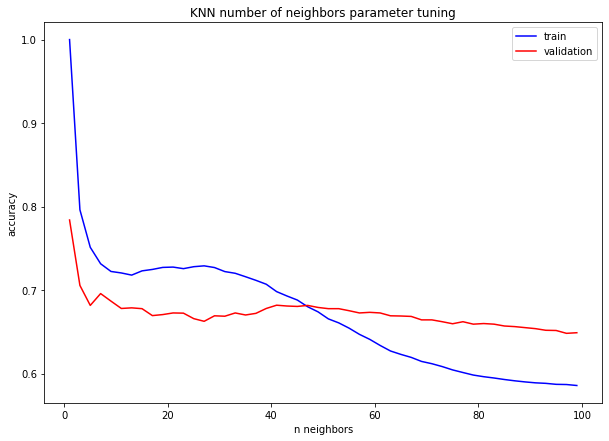

In [133]:
# Create a line plot

plt.figure(figsize=(10, 7))
plt.plot(k_values, train_scores, c='blue', label='train')
plt.plot(k_values, validation_scores, c='red', label='validation')
plt.xlabel('n neighbors')
plt.ylabel('accuracy')
plt.title("KNN number of neighbors parameter tuning")
plt.legend()
plt.show()

- According to the plot, the highest validation accuracy is achieved for small Ks.
- Also, it seems to be an <b>intercept in the area where n neighbors is between 40 to 50.</b>

Look for the point in the chart where the training and validation accuracy is closest or intercept:

In [134]:
# the index of the minimal distance

best_idx = np.argmin(np.abs(np.array(train_scores) - np.array(validation_scores)))
k_values[best_idx]

47

In [135]:
print(f"An optimal value for K in the KNN algorithm is {k_values[best_idx]}.")

An optimal value for K in the KNN algorithm is 47.


In [136]:
# Re-fit the model

scaler = StandardScaler()
scaler.fit(X_remainder)

X_remainder = scaler.transform(X_remainder)
X_test = scaler.transform(X_test)

final_dt = KNeighborsClassifier(n_neighbors = k_values[best_idx])
final_dt.fit(X_remainder, y_remainder)

# Score on the test set
print('Final test score:', final_dt.score(X_test, y_test))

Final test score: 0.7197093977033044


#### What is the issue with splitting the data into train and validation sets after performing vectorization

- Splitting the data into training and validation sets before performing vectorization is a common practice in machine learning. This is because the validation set is used to evaluate the performance of the model on unseen data, and thus it should not be used in any way to influence the feature extraction process.

- If the vectorization is performed before the split, the validation set might leak information about the training set into the feature extraction process. This is because the vectorization process is often influenced by the characteristics of the data it is applied to. As a result, the validation set might contain information that the model has already "seen" during the vectorization process, which can lead to overly optimistic performance estimates.

- Therefore, it is better to split the data into training and validation sets before performing vectorization. This ensures that the validation set is completely independent of the training set and any information contained in it.

## Decision Tree Classifier

#### Fit a decision tree model to this data

In [137]:
#Fit the model to the train dataframe

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

print(f"The train classification accuracy is:  {DT_model.score(X_train,y_train)}")
print(f"The test classification accuracy is:  {DT_model.score(X_test,y_test)}")

The train classification accuracy is:  1.0
The test classification accuracy is:  0.7009608624326225


#### Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree

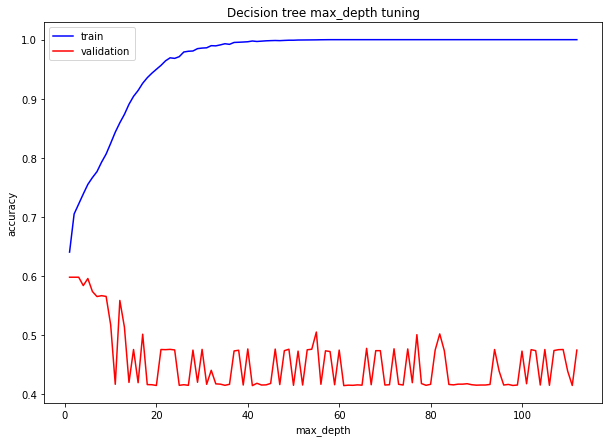

In [138]:
from sklearn.tree import DecisionTreeClassifier

depths = list(range(1, int(np.sqrt(len(X_train)))))
train_scores = []
validation_scores = []

for d in depths:    
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    
    # Evaluate
    train_scores.append(dt.score(X_train, y_train))
    validation_scores.append(dt.score(X_validation, y_validation))
    
plt.figure(figsize=(10, 7))
plt.plot(depths, train_scores, c='blue', label='train')
plt.plot(depths, validation_scores, c='red', label='validation')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Decision tree max_depth tuning")
plt.legend()
plt.show()

- The best Decision Tree model gave accuracy around <b>60% with max_depth below 10.</b>

#### Compare the accuracies between some max_depth values

In [139]:
# Max_depth = 1

DT_model1 = DecisionTreeClassifier(max_depth = 1)
DT_model1.fit(X_train, y_train)

print(f"The train classification accuracy is:  {DT_model1.score(X_train,y_train)}")
print(f"The test classification accuracy is:  {DT_model1.score(X_test,y_test)}")

The train classification accuracy is:  0.6406469760900141
The test classification accuracy is:  0.6318256386219827


In [140]:
# Max_depth = 5

DT_model5 = DecisionTreeClassifier(max_depth = 5)
DT_model5.fit(X_train, y_train)

print(f"The train classification accuracy is:  {DT_model5.score(X_train,y_train)}")
print(f"The test classification accuracy is:  {DT_model5.score(X_test,y_test)}")

The train classification accuracy is:  0.7551961243944366
The test classification accuracy is:  0.739629716428404


In [141]:
# Max_depth = 10

DT_model10 = DecisionTreeClassifier(max_depth = 10)
DT_model10.fit(X_train, y_train)

print(f"The train classification accuracy is:  {DT_model10.score(X_train,y_train)}")
print(f"The test classification accuracy is:  {DT_model10.score(X_test,y_test)}")

The train classification accuracy is:  0.8246601031411158
The test classification accuracy is:  0.7358800093742677


#### Two advantages of decision trees over KNN

- Decision tree supports automatic feature interaction, whereas KNN does not.
- Decision tree is faster due to KNN's expensive real time execution.

#### Two weaknesses of decision trees (classification or regression trees)

- Decision tree model may change considerably by a small change in the data. 
- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. 

## Purpose of the Validation Set 

- The purpose of the validation set is to find and optimize the best model to solve a given problem. Moreover, this validation process gives information that helps tune the model's hyperparameters and configurations accordingly.

- The `validation set` <b>is used to optimize the model parameters</b> while the `test set` <b>is used to provide an unbiased estimate of the final model.</b>

## Re-run a Decision Tree or Logistic Regression

#### Perform a 5-fold cross validation to optimize the hyperparameters of the model

In [143]:
# Instanitate model
my_logreg = LogisticRegression(random_state=1)

# Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
scores = cross_val_score(my_logreg, X_remainder, y_remainder, cv = 5)
print(scores)

[0.73782497 0.72720615 0.73479853 0.73186813 0.73699634]


In [144]:
# Every score corresponds to a fold

for i in range(len(scores)) :
    print(f"Fold {i+1}: {scores[i]}")

Fold 1: 0.737824972537532
Fold 2: 0.7272061515928231
Fold 3: 0.7347985347985349
Fold 4: 0.7318681318681318
Fold 5: 0.736996336996337


In [145]:
# The average score over the 5 folds

print(f"Average Score:{np.mean(scores)}")

Average Score:0.7337388255586718


#### Fit a logistic regression to predict the ratings, and see how the model performs

In [146]:
# Instantiate model
hotel_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fit model
hotel_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [148]:
# Score model

print(f"Score on train set: {hotel_logit.score(X_train, y_train)}")
print(f"Score on test set: {hotel_logit.score(X_test, y_test)}")

Score on train: 0.885841537740272
Score on test: 0.7337707991563159


- At this point, it is approximately 88.5% accuracy on the train set and 73.3% accuracy on the test set.

#### What does your confusion matrix look like for your best model on the test set?

In [150]:
# Get class predictions
y_pred = hotel_logit.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Good Ratings", "Predicted Not Good Ratings"],
    index=["True Good Ratings", "True Not Good Ratings"]
)

display(cf_df)

,Predicted Good Ratings,Predicted Not Good Ratings
True Good Ratings,1236,573
True Not Good Ratings,563,1895


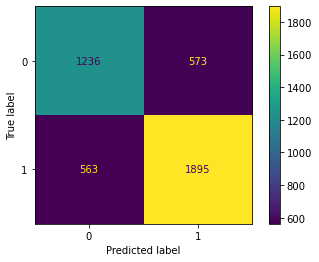

In [153]:
# The function expects the estimator, inputs and target as parameters
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(hotel_logit, X_test, y_test);

- <b>TP</b>: The vast majority of data points are from class 1 and they were correctly predicted as bad ratings.
- <b>FN</b>: There was a small number of bad ratings that was incorrectly classified as good ratings.
- <b>FP</b>: There was also a small number of good ratings that was incorrectly classified as bad ratings.

In [154]:
# Select the FP from the confusion matrix
# true label 0 & predicted label 1

fp = cf_matrix[0, 1]

print(f"{fp} good ratings were misclassified as bad ratings.")

573 good ratings were misclassified as bad ratings.


In [156]:
# Select the TN from the confusion matrix
# true label 0 & predicted label 0

tn = cf_matrix[0, 0]

# total number of true label 1
num_rating = cf_matrix[0, :].sum()

print(f"{tn} good ratings were predicted correctly by the model out of {num_rating} ratings.")

1236 good ratings were predicted correctly by the model out of 1809 ratings.


In [157]:
# select the TP from the confusion matrix
# true label 1 & predicted label 1
tp = cf_matrix[1, 1]

# total number of true label 1
num_rating = cf_matrix[1, :].sum()

print(f"{tp} bad ratings were predicted correctly by the model out of {num_rating} ratings.")

1895 bad ratings were predicted correctly by the model out of 2458 ratings.


In [159]:
# select the FN from the confusion matrix
# true label 1 & predicted label 0
fn = cf_matrix[1, 0]

print(f"{tp} bad ratings were misclassified as good ratings.")

1895 bad ratings were misclassified as good ratings.


## Create One New Feature

#### Explain your new feature and why you consider it will improve accuracy

In [162]:
train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,n_worth,n_would,n_write,n_wrong,n_year,n_yes,n_yet,n_young,rating,Total_Num_of_Word_Counts
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,1,164
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,1,10
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,1,40
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,17
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,19


- `Total_Num_of_Word_Counts` = `Review_Total_Positive_Word_Counts`+`Review_Total_Negative_Word_Counts` (+ Optional: Common_Used_Words)
- The new feature would be `Total_Num_of_Word_Counts` which is the sum of `Review_Total_Positive_Word_Counts` and `Review_Total_Negative_Word_Counts`.
- (Common_Used_Words represents the words such as is, am, are, the, in, at)
- This new feature will allow the user/analyst to recheck whether the values in `Review_Total_Positive_Word_Counts`and`Review_Total_Negative_Word_Counts` columns are correct.

In [161]:
# Add `Total_Num_of_Word_Counts` column to train_df

train_df["Total_Num_of_Word_Counts"] = train_df["Review_Total_Positive_Word_Counts"] + train_df["Review_Total_Negative_Word_Counts"]

train_df["Total_Num_of_Word_Counts"].head()

0    164
1     10
2     40
3     17
4     19
Name: Total_Num_of_Word_Counts, dtype: int64

In [170]:
# Add `Total_Num_of_Word_Counts` column to test_df

test_df["Total_Num_of_Word_Counts"] = test_df["Review_Total_Positive_Word_Counts"] + test_df["Review_Total_Negative_Word_Counts"]

test_df["Total_Num_of_Word_Counts"].head()

0      6
1    167
2      9
3     19
4     13
Name: Total_Num_of_Word_Counts, dtype: int64

#### Run the model from question 5 again. You will have to re-optimize your hyperparameters. Has the accuracy score of your best model improved on the test set after adding the new feature you created?

In [171]:
# Assign X and y to 'test_df' dataset

# Independent variables
# All columns but 'rating'
new_X_test = test_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
new_y_test = test_df['rating']

In [172]:
# Assign X and y to 'train_df' dataset

# Independent variables
# All columns but 'rating'
new_X_train = train_df.drop(columns = ['rating'], axis = 1)

# Dependent variable
new_y_train = train_df['rating']

In [176]:
# Re-fit the model

scaler = StandardScaler()
scaler.fit(new_X_remainder)

new_X_remainder = scaler.transform(new_X_remainder)
new_X_test = scaler.transform(new_X_test)

ValueError: X has 2744 features, but StandardScaler is expecting 2743 features as input.

In [165]:
# Instanitate model
my_new_logreg = LogisticRegression(random_state=1)

# Fit model on 5 folds.
# The variable "scores" will hold 5 accuracy scores, 
# each from a different train and validation split
new_scores = cross_val_score(my_new_logreg, new_X_remainder, new_y_remainder, cv = 5)
print(new_scores)

[0.73782497 0.72720615 0.73479853 0.73186813 0.73699634]


In [167]:
# Every score corresponds to a fold

for i in range(len(new_scores)) :
    print(f"Fold {i+1}: {new_scores[i]}")

Fold 1: 0.737824972537532
Fold 2: 0.7272061515928231
Fold 3: 0.7347985347985349
Fold 4: 0.7318681318681318
Fold 5: 0.736996336996337


In [166]:
# The average score over the 5 folds

print(f"Average Score:{np.mean(new_scores)}")

Average Score:0.7337388255586718


In [168]:
# Instantiate model
new_hotel_logit = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)

# Fit model
new_hotel_logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [169]:
# Score model

print(f"Score on train set: {new_hotel_logit.score(new_X_train, new_y_train)}")
print(f"Score on test set: {new_hotel_logit.score(new_X_test, new_y_test)}")

Score on train set: 0.885841537740272
Score on test set: 0.7337707991563159


Conclusion:
   - The accuracy score of my best model is slightly improved on the test set after adding the new feature.